In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# re-size all the images to this
IMAGE_SIZE = [256,256]

# add preprocessing layer to the front of VGG
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
  layer.trainable = False
  

# our layers - you can add more if you want
x = Flatten()(inception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(18, activation='softmax')(x)


# create a model object
model = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [3]:


# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_data_dir="/content/drive/MyDrive/FYP2Dataset/"

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

training_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256,256),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data

test_set = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(256,256),
    batch_size=8,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1186 images belonging to 18 classes.
Found 295 images belonging to 18 classes.


In [7]:

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
149/149 [==============================] - 1169s 8s/step - loss: 5.3552 - accuracy: 0.6712 - val_loss: 3.0484 - val_accuracy: 0.8203
Epoch 2/30
149/149 [==============================] - 32s 218ms/step - loss: 1.6036 - accuracy: 0.8777 - val_loss: 5.0003 - val_accuracy: 0.8136
Epoch 3/30
149/149 [==============================] - 32s 216ms/step - loss: 1.3802 - accuracy: 0.9081 - val_loss: 4.0787 - val_accuracy: 0.8339
Epoch 4/30
149/149 [==============================] - 32s 217ms/step - loss: 1.1359 - accuracy: 0.9309 - val_loss: 3.8589 - val_accuracy: 0.8881
Epoch 5/30
149/149 [==============================] - 32s 218ms/step - loss: 0.9682 - accuracy: 0.9427 - val_loss: 4.1536 - val_accuracy: 0.8441
Epoch 6/30
149/149 [==============================] - 32s 217ms/step - loss: 0.8152 - accuracy: 0.9578 - val_loss: 5.0293 - val_accuracy: 0.8237
Epoch 7/30
149/149 [==============================] - 32s 217ms/step - loss: 0.7621 - accuracy: 0.9503 - val_loss: 4.9312 - val_acc

In [9]:
model.save('/content/drive/MyDrive/Models/InceptionV3-98-90.h5')

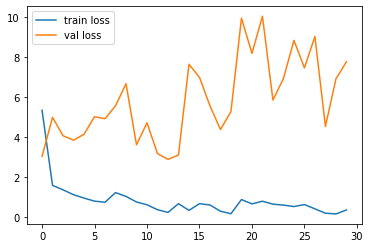

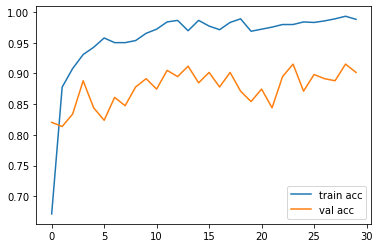

In [10]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:




# train_path = 'Datasets/Train'
# valid_path = 'Datasets/Test'

  
#   # useful for getting number of classes
# folders = glob('Datasets/Train/*')
  


# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory('Datasets/Train',
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

# test_set = test_datagen.flow_from_directory('Datasets/Test',
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')

# '''r=model.fit_generator(training_set,
#                          samples_per_epoch = 8000,
#                          nb_epoch = 5,
#                          validation_data = test_set,
#                          nb_val_samples = 2000)'''

# # fit the model
# r = model.fit_generator(
#   training_set,
#   validation_data=test_set,
#   epochs=5,
#   steps_per_epoch=len(training_set),
#   validation_steps=len(test_set)
# )
# # loss
# plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # accuracies
# plt.plot(r.history['acc'], label='train acc')
# plt.plot(r.history['val_acc'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

# import tensorflow as tf

# from keras.models import load_model

# model.save('facefeatures_new_model.h5')